# Loading necessary libraries

In [26]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [27]:
%matplotlib inline 
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

# Loading the dataset

In [28]:
df = pd.read_csv("bank-full.csv")

In [29]:
df.head()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  58;"management";"married";"tertiary";"no";2143...                                                                                                  
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4  33;"unknown";"single";"unknown";"no";1;"no";"n...

In [30]:
# Read the CSV file and split by semicolons
file_path = 'bank-full.csv'
data = []
with open(file_path, 'r') as file:
    for line in file:
        split_line = line.strip().split(';')
        data.append(split_line)

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Remove double quotes from data
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

#convertin the first row as column name and resetting the index 
df.columns = df.iloc[0]
df = df[1:]
df = df.reset_index(drop=True)

In [31]:
df.head()

0 age           job  marital  education default balance housing loan  contact  \
0  58    management  married   tertiary      no    2143     yes   no  unknown   
1  44    technician   single  secondary      no      29     yes   no  unknown   
2  33  entrepreneur  married  secondary      no       2     yes  yes  unknown   
3  47   blue-collar  married    unknown      no    1506     yes   no  unknown   
4  33       unknown   single    unknown      no       1      no   no  unknown   

0 day month duration campaign pdays previous poutcome   y  
0   5   may      261        1    -1        0  unknown  no  
1   5   may      151        1    -1        0  unknown  no  
2   5   may       76        1    -1        0  unknown  no  
3   5   may       92        1    -1        0  unknown  no  
4   5   may      198        1    -1        0  unknown  no

In [32]:
df.shape

(45211, 17)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [34]:
df.isnull().sum()

0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [35]:
def unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
unique_col_values(df)                

age: ['58' '44' '33' '47' '35' '28' '42' '43' '41' '29' '53' '57' '51' '45'
 '60' '56' '32' '25' '40' '39' '52' '46' '36' '49' '59' '37' '50' '54'
 '55' '48' '24' '38' '31' '30' '27' '34' '23' '26' '61' '22' '21' '20'
 '66' '62' '83' '75' '67' '70' '65' '68' '64' '69' '72' '71' '19' '76'
 '85' '63' '90' '82' '73' '74' '78' '80' '94' '79' '77' '86' '95' '81'
 '18' '89' '84' '87' '92' '93' '88']
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
balance: ['2143' '29' '2' ... '8205' '14204' '16353']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: ['5' '6' '7' '8' '9' '12' '13' '14' '15' '16' '19' '20' '21' '23' '26'
 '27' '28' '29' '30' '2' '3' '4' '11' '17' '18' '24' '25' '1' '10' '22'
 '31']
month: ['may' 'jun' 'jul' 'aug' 'oc

In [36]:
df.dtypes

0
age          object
job          object
marital      object
education    object
default      object
balance      object
housing      object
loan         object
contact      object
day          object
month        object
duration     object
campaign     object
pdays        object
previous     object
poutcome     object
y            object
dtype: object

In [37]:
#Converting the Object types into numeric fields (integers)
def change_int(df):
    col = ['age','day','duration','campaign','pdays','previous']
    for val in col:
        df[val] = pd.to_numeric(df[val], errors='coerce', downcast='integer')
change_int(df)      

In [38]:
#balance is the only floating point and we have converted it from object dtype to float. 
df['balance'] = pd.to_numeric(df['balance'], errors='coerce', downcast='float')

In [39]:
df.dtypes

0
age             int8
job           object
marital       object
education     object
default       object
balance      float32
housing       object
loan          object
contact       object
day             int8
month         object
duration       int16
campaign        int8
pdays          int16
previous       int16
poutcome      object
y             object
dtype: object

In [40]:
#rename the churn prediction column to churn
df.rename(columns={'y': 'churn'}, inplace=True)
#dropping the column month
#df.drop('month',axis='columns',inplace=True)

In [41]:
df = pd.get_dummies(data=df, columns = ['marital','contact','job', 'education', 'poutcome'])

In [42]:
#converting all the yes and no to a one or zero
def convert_cat(df):
    cols = ['default','housing','loan','churn']
    for col in cols:
        df[col].replace({'yes': 1,'no': 0},inplace=True)
        
convert_cat(df)
    

In [43]:
df.head()

age  default  balance  housing  loan  day month  duration  campaign  pdays  \
0   58        0   2143.0        1     0    5   may       261         1     -1   
1   44        0     29.0        1     0    5   may       151         1     -1   
2   33        0      2.0        1     1    5   may        76         1     -1   
3   47        0   1506.0        1     0    5   may        92         1     -1   
4   33        0      1.0        0     0    5   may       198         1     -1   

   ...  job_unemployed  job_unknown  education_primary  education_secondary  \
0  ...               0            0                  0                    0   
1  ...               0            0                  0                    1   
2  ...               0            0                  0                    1   
3  ...               0            0                  0                    0   
4  ...               0            1                  0                    0   

   education_tertiary  education_unknown  poutcome_failure  poutcome_other  \
0                   1                  0                 0               0   
1                   0                  0                 0               0   
2                   0                  0                 0               0   
3                   0                  1                 0               0   
4                   0                  1                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 38 columns]

In [44]:
df.describe()

age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.275635      0.555838      0.160226   
std       10.618762      0.133049    3044.793213      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

                day      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      15.806419    258.163080      2.763841     40.197828      0.580323   
std        8.322476    257.527812      3.098021    100.128746      2.303441   
min        1.000000      0.000000      1.000000     -1.000000      0.000000   
25%        8.000000    103.000000      1.000000     -1.000000      0.000000   
50%       16.000000    180.000000      2.000000     -1.000000      0.000000   
75%       21.000000    319.000000      3.000000     -1.000000      0.000000   
max       31.000000   4918.000000     63.000000    871.000000    275.000000   

       ...  job_unemployed   job_unknown  education_primary  \
count  ...    45211.000000  45211.000000       45211.000000   
mean   ...        0.028820      0.006370           0.151534   
std    ...        0.167303      0.079559           0.358572   
min    ...        0.000000      0.000000           0.000000   
25%    ...        0.000000      0.000000           0.000000   
50%    ...        0.000000      0.000000           0.000000   
75%    ...        0.000000      0.000000           0.000000   
max    ...        1.000000      1.000000           1.000000   

       education_secondary  education_tertiary  education_unknown  \
count         45211.000000        45211.000000       45211.000000   
mean              0.513194            0.294198           0.041074   
std               0.499831            0.455687           0.198464   
min               0.000000            0.000000           0.000000   
25%               0.000000            0.000000           0.000000   
50%               1.000000            0.000000           0.000000   
75%               1.000000            1.000000           0.000000   
max               1.000000            1.000000           1.000000   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
count      45211.000000    45211.000000      45211.000000      45211.000000  
mean           0.108403        0.040698          0.033421          0.817478  
std            0.310892        0.197592          0.179735          0.386278  
min            0.000000        0.000000          0.000000          0.000000  
25%            0.000000        0.000000          0.000000          1.000000  
50%            0.000000        0.000000          0.000000          1.000000  
75%            0.000000        0.000000          0.000000          1.000000  
max            1.000000        1.000000          1.000000          1.000000  

[8 rows x 37 columns]

# Visualisations of the data

In [45]:
df1 = df['churn'].value_counts()
print(df1)

0    39922
1     5289
Name: churn, dtype: int64


Data is looking skewed as expected

(array([39922.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5289.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

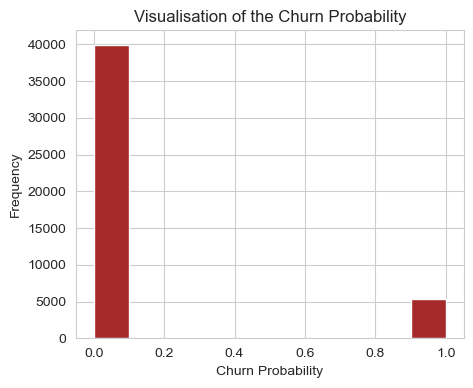

In [46]:
plt.xlabel("Churn Probability")
plt.ylabel("Frequency")
plt.title("Visualisation of the Churn Probability")
plt.hist(df['churn'], color = 'brown')

Let us look at monthly churn and see what the trend looked like

In [47]:
#First let us make our months attribute a categorical variable
df['month'] = pd.Categorical(df['month'], ["jan", "feb", "mar","apr","may","jun","jul","aug","sep","oct","nov","dec"])


In [48]:
#now let sort all our variables in the months specified 
df2 = df.sort_values("month")

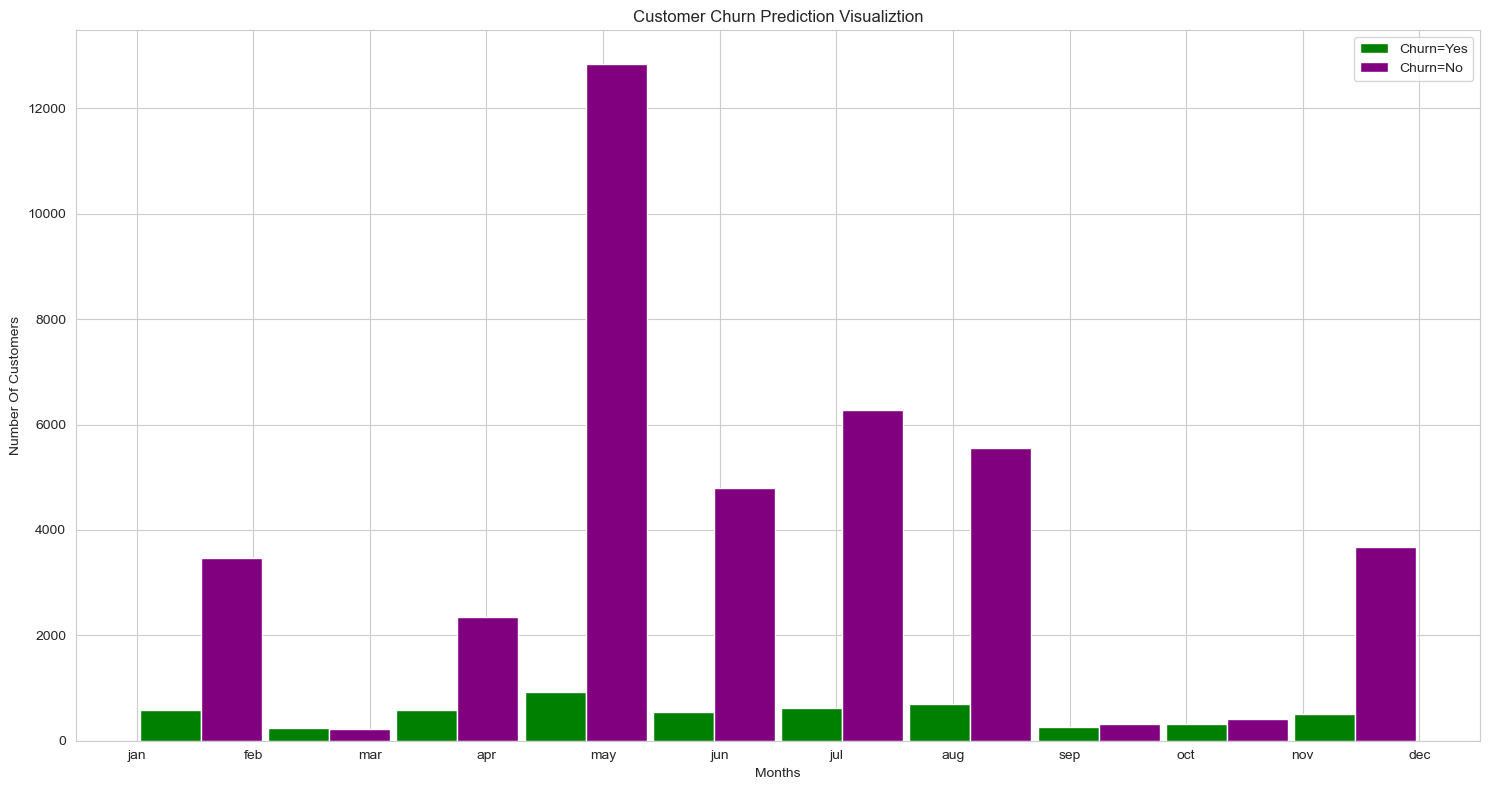

In [49]:
mon_churn_no = df2[df2.churn==0].month
mon_churn_yes = df2[df2.churn==1].month
plt.figure(figsize=(15,8))
plt.xlabel("Months")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mon_churn_yes, mon_churn_no], rwidth=0.95, color=['green','purple'],label=['Churn=Yes','Churn=No'])
plt.tight_layout()
plt.legend()

In [53]:
sb.pairplot(df)

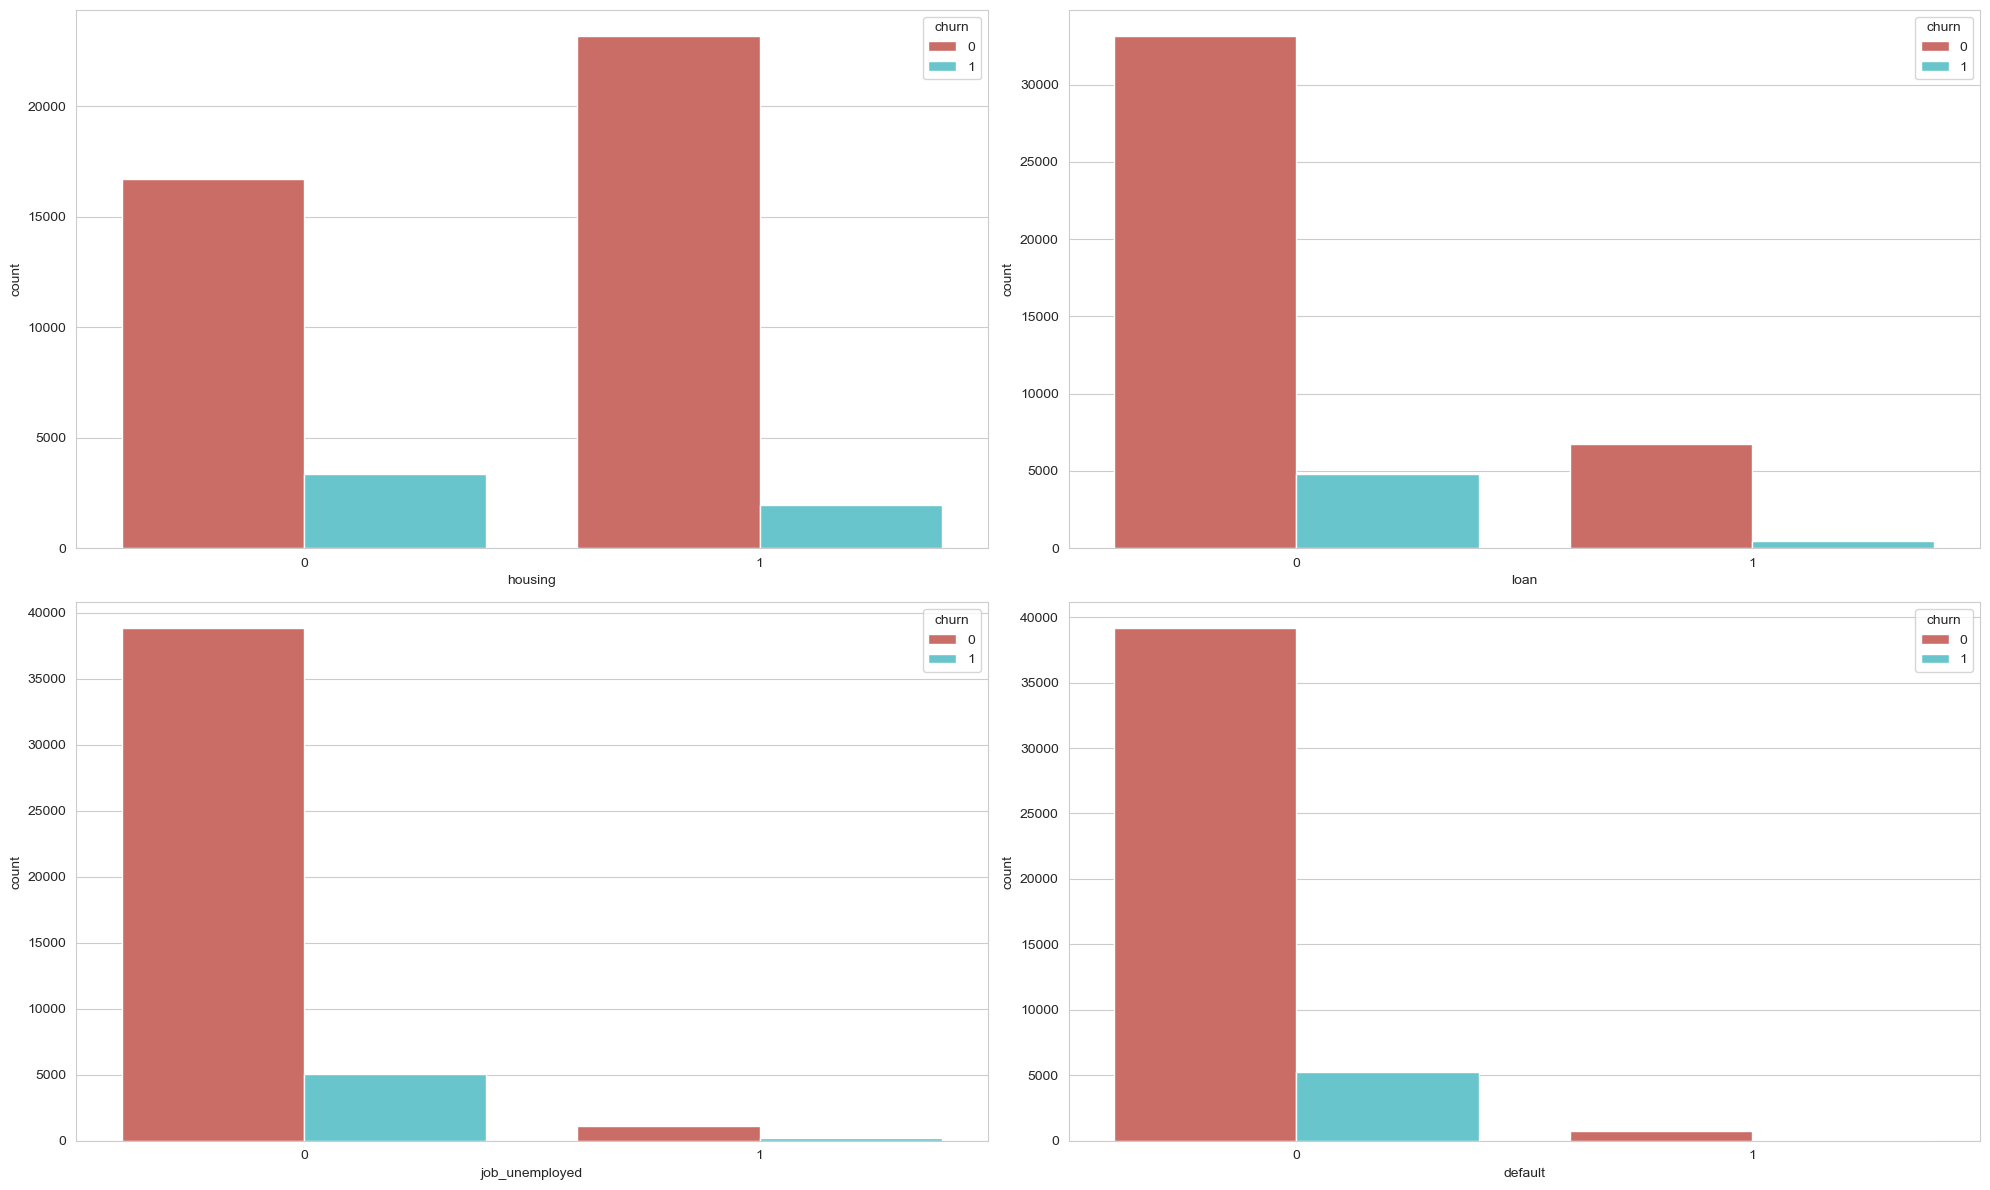

In [55]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sb.countplot(x='housing', hue = 'churn',data = df, palette='hls',ax=axarr[0][0])
sb.countplot(x='loan', hue = 'churn',data = df, palette='hls', ax=axarr[0][1])
sb.countplot(x='job_unemployed', hue = 'churn',data = df, palette='hls', ax=axarr[1][0])
sb.countplot(x='default', hue = 'churn',data = df, palette='hls', ax=axarr[1][1])
plt.tight_layout()
plt.show();

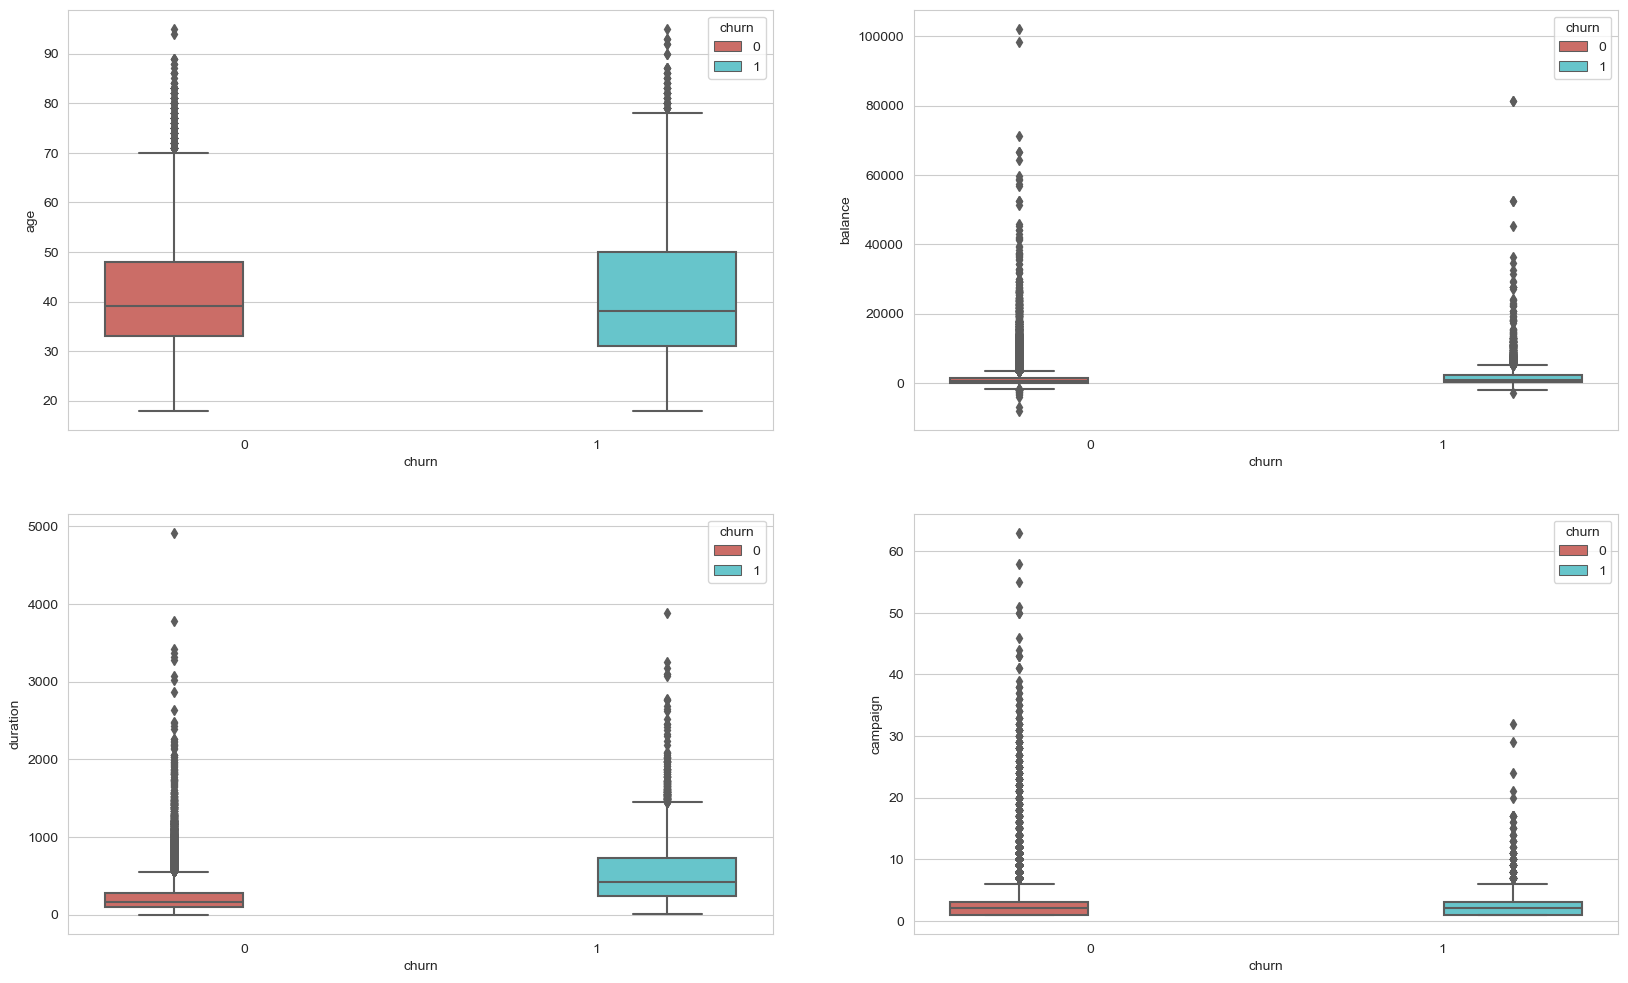

In [56]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sb.boxplot(y='age',x = 'churn', hue = 'churn',data = df,palette='hls', ax=axarr[0][0])
sb.boxplot(y='balance',x = 'churn', hue = 'churn',data = df , palette='hls', ax=axarr[0][1])
sb.boxplot(y='duration',x = 'churn', hue = 'churn',data = df, palette='hls', ax=axarr[1][0])
sb.boxplot(y='campaign',x = 'churn', hue = 'churn',data = df, palette='hls', ax=axarr[1][1])
plt.show();

<AxesSubplot:>

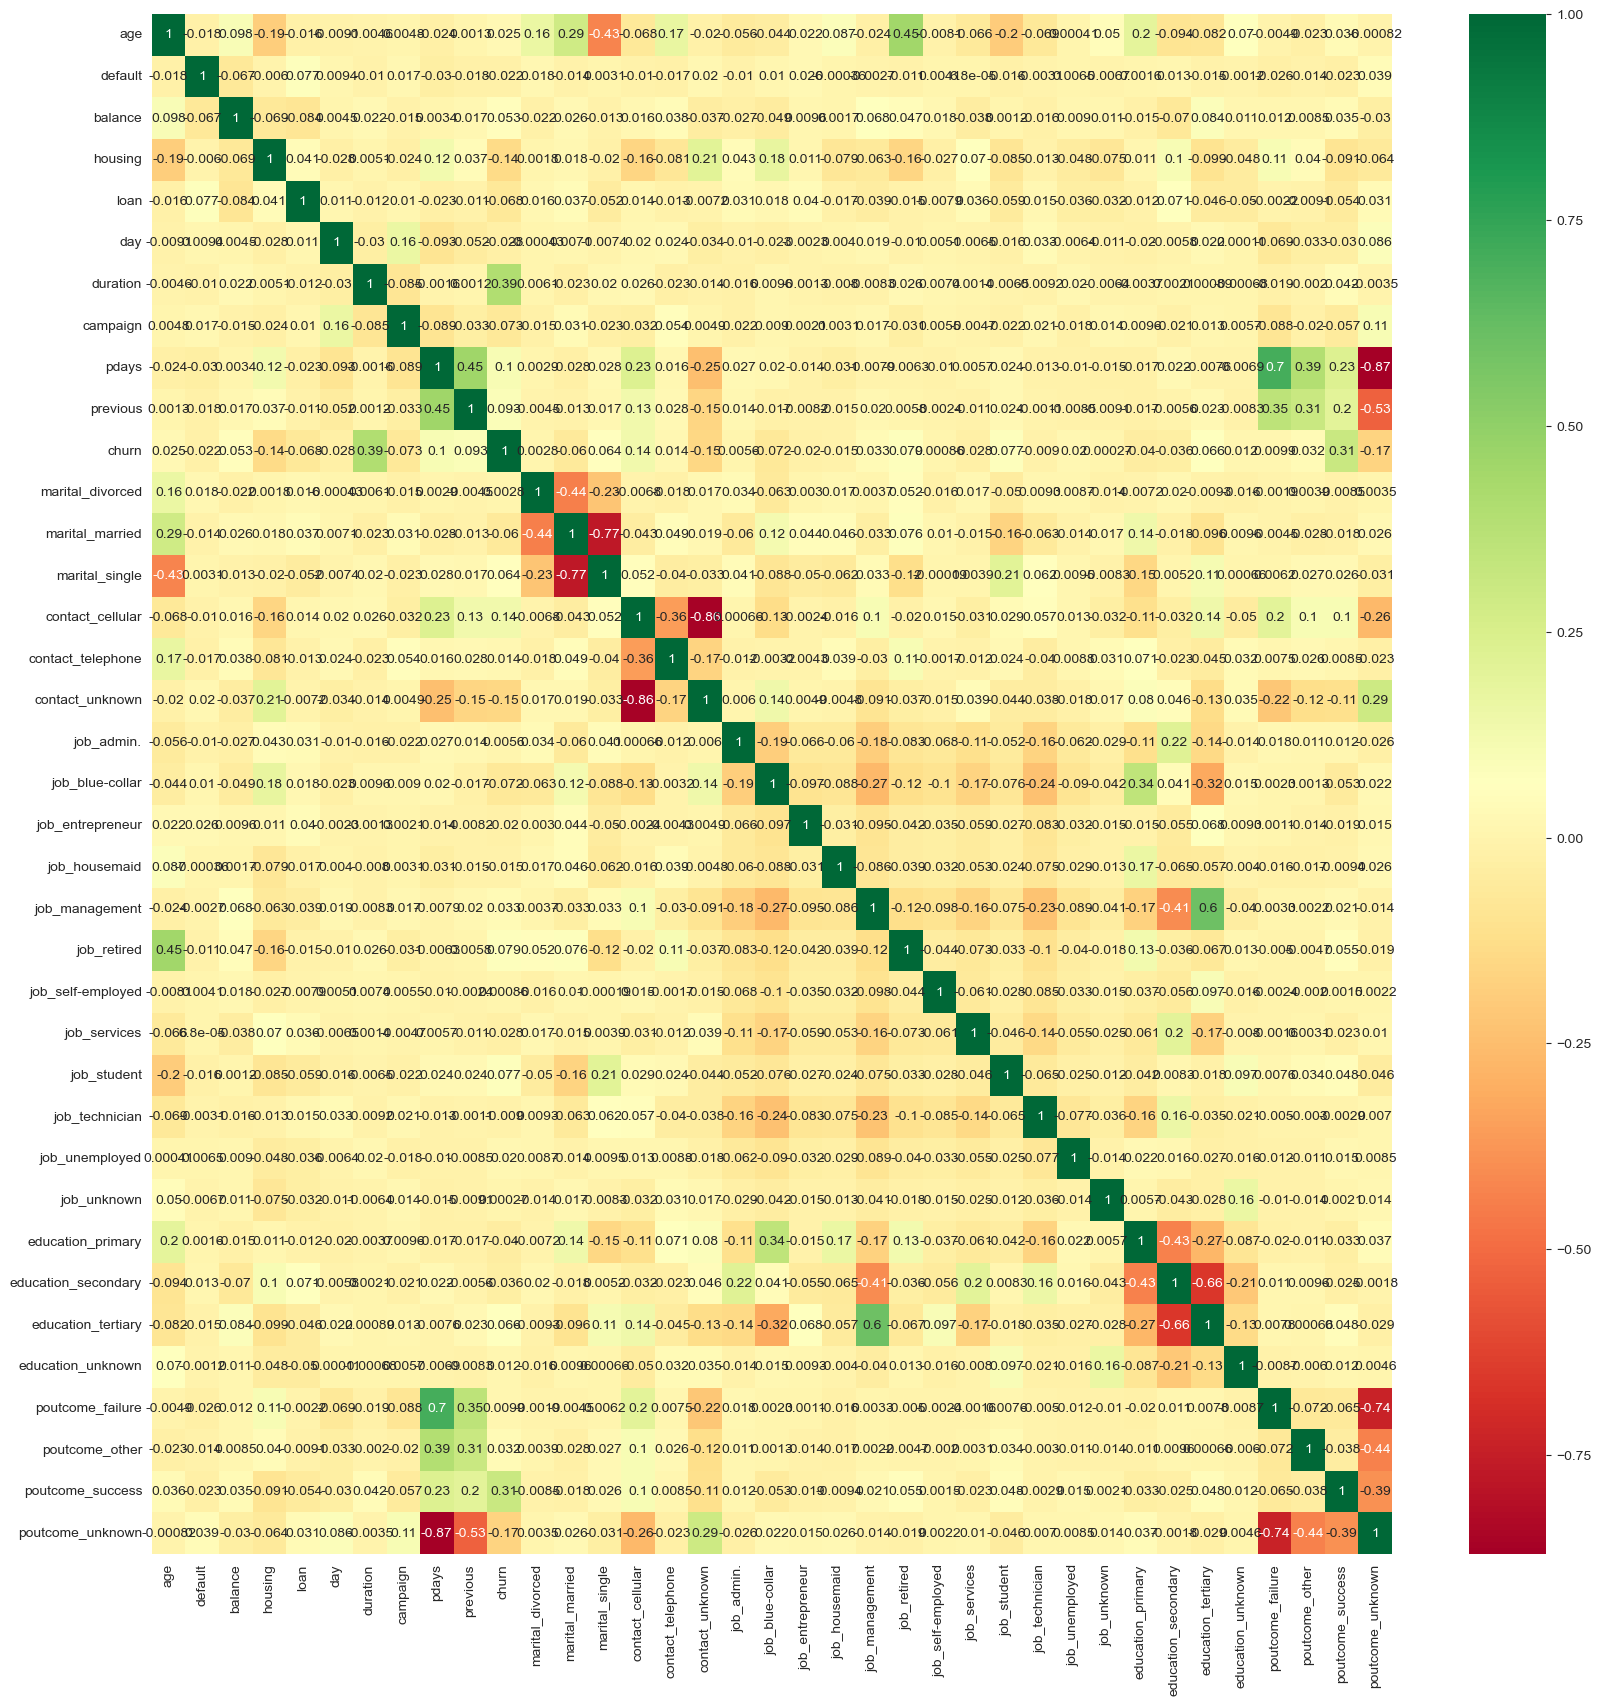

In [59]:
# Plotting The Correlations using a heatmap between all the features
corr_matrix = df.corr()
top_features = corr_matrix.index
plt.figure(figsize=(20,20))
sb.heatmap(df[top_features].corr(), annot=True, cmap='RdYlGn')